# Spectrum filtering

Let's try with different components of the spectrum to see how do they contribute to the signal

In [182]:
import glob
import numpy as np
from scipy import fftpack
# %matplotlib notebook
%matplotlib inline
import matplotlib.pyplot as plt 
from matplotlib.backends.backend_pdf import PdfPages


In [183]:
folders = ['0_setup_protons',
'1_protons_1e11_both_ch',
'2_protons_1e11_ch1_high_BW',
'3_protons_1e11_both_untiltheend',
'4_electrons_600pC_ch1_high_BW',
'5_electrons_600pC_ch1_both_ch',
'6_electrons_steering_both_ch_reference',
'7_electrons_steering_both_ch_-5mm',
'8_electrons_steering_both_ch_0',
'9_electrons_steering_both_ch_+5mm',
'10_protons_2e11_2ch',
'11_protons_2e11_ch1_high_BW',
'12_protons+electrons_2ch_simultaneous',
'13_protons+electrons_ch1_simultaneous',
'14_protons+electrons_2ch_simultaneous_electron_bump+5mm',
'15_protons+electrons_2ch_simultaneous_electron_bump-5mm',
'16_protons+electrons_1ch_simultaneous_electron_bump-5mm',
'17_protons+electrons_1ch_simultaneous_electron_bump_in_centre',
'18_protons+electrons_1ch_simultaneous_electron_bump+5mm',
'19_electrons_ahead_3ns_zoom',
'20_electrons_ahead_2ch',
'21_electrons_ahead_3ns_ch1',
'22_electrons_behind_3ns_2ch',
'23_electrons_behind_3ns_ch1',
'24_until_the_last_proton_beam_alone_2ch']

paths = ['./data/'+f+'/*.txt' for f in folders]

files = [sorted(glob.glob(p)) for p in paths]

In [187]:
def gimme(data_path, header_len=5):
    '''
    Produce the output of the single file analysis:
    
    data_path: the file including path
    
    data[0]: the timescale of the trace
    data[1]: the signal of the trace
    t_sampl: the sampling time
    freqs: the FFT frequency scale (the x axis in practice)
    f_spectrum_complex: the FFT output. Complex numbers.
    f_spectrum_abs: the FFT output. Complex numbers.

    '''
    data = np.loadtxt(data_path, delimiter=' ', skiprows=header_len)
    data = data.transpose()
    t_sampl = np.abs(data[0][0]-data[0][1])
    
    f_spectrum_complex = fftpack.fft(data[1])
    freqs = fftpack.fftfreq(data[1].size, d=t_sampl )
    
    f_spectrum_abs = np.abs(f_spectrum_complex)
    
    return data[0], data[1], t_sampl, freqs, f_spectrum_complex, f_spectrum_abs


In [188]:
## new version
def do_fft(tscale, signal):
    f_spectrum = fftpack.fft(signal)
    freqs = fftpack.fftfreq(tscale.size, d=tscale[1]-tscale[0] )
    return freqs, f_spectrum

def plot_norm_spectrum(fig, ax, freq, spectrum):
    ax.plot(freqs*1e-9, np.abs(f_spectrum))

def do_and_plot(fig, ax, tscale, signal, label='', flow=0, fhi=0, plot=True):
    freqs, f_spectrum = do_fft(ch1[0], ch1[1])
    # bandpass filter
    if not(flow==0 and fhi==0):
        bool_idx =  np.logical_or(np.logical_and(freqs>flow, freqs<fhi), np.logical_and(freqs<-flow, freqs>-fhi))
        f_spectrum[~bool_idx] = 0.
    # plot on/off
    if plot:
        ax.plot(freqs*1e-9, np.abs(f_spectrum),label=label)
        ax.set_xlim(0, 12.5)
        ax.set_xlabel('Frequency (GHz)')
        ax.legend(frameon=True)
    
    return (tscale, signal), (freqs, f_spectrum)

def ifft_and_plot(fig, ax, norm_signal, freq_spectrum, label='', plot=True):
    tscale = norm_signal[0]
    f_spectrum = freq_spectrum[1]
    # ifft
    y_ifft = fftpack.ifft(f_spectrum)
    # plot on/off
    if plot:
        ax.plot(tscale, y_ifft,label=label)
        ax.set_xlim(-0.05e-7, 0.25e-7)
        ax.legend(frameon=True)

# Protons

In [189]:
# load the protons
ch1 = gimme(files[10][5])
ch2 = gimme(files[10][16])

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


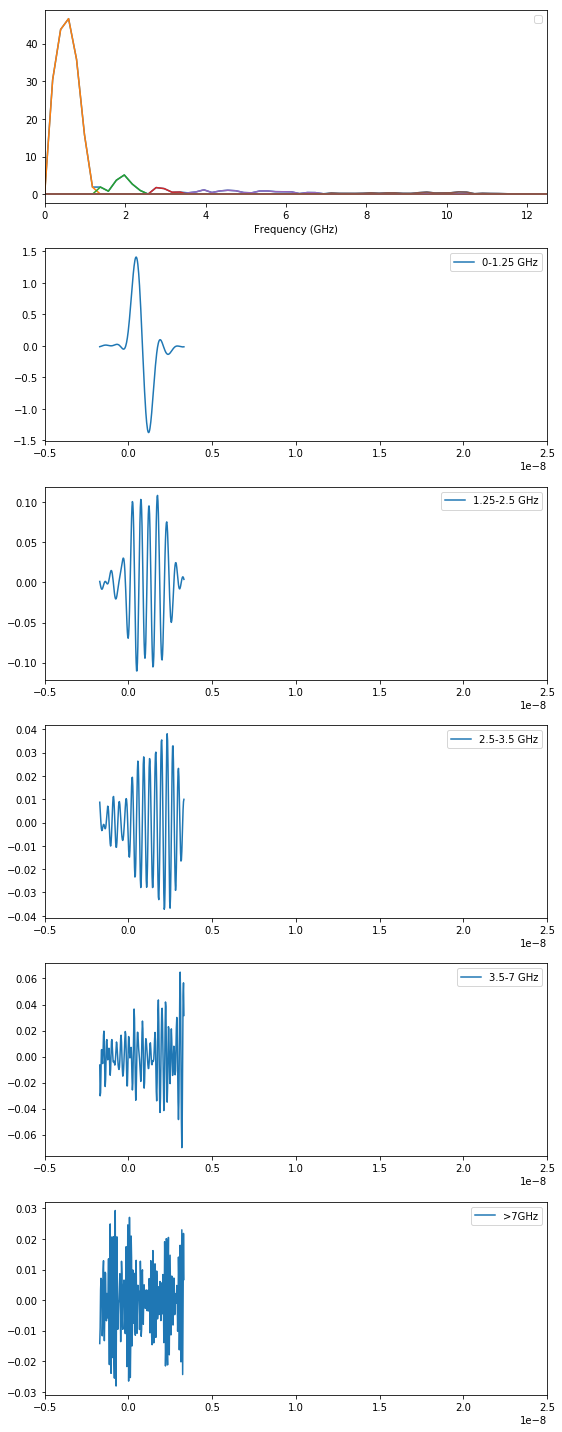

In [190]:
fig, ax = plt.subplots(6, figsize=(8,20))

full_s = do_and_plot(fig, ax[0], ch1[0], ch1[1])
cut_1 = do_and_plot(fig, ax[0], ch1[0], ch1[1], flow=0, fhi=1.25e9)
ifft_and_plot(fig, ax[1], *cut_1, label='0-1.25 GHz')
cut_2 = do_and_plot(fig, ax[0], ch1[0], ch1[1], flow=1.25e9, fhi=2.5e9)
ifft_and_plot(fig, ax[2], *cut_2, label='1.25-2.5 GHz')
cut_3 = do_and_plot(fig, ax[0], ch1[0], ch1[1], flow=2.5e9, fhi=3.48e9)
ifft_and_plot(fig, ax[3], *cut_3, label='2.5-3.5 GHz')
cut_4 = do_and_plot(fig, ax[0], ch1[0], ch1[1], flow=3.48e9, fhi=7e9)
ifft_and_plot(fig, ax[4], *cut_4, label='3.5-7 GHz')
cut_5 = do_and_plot(fig, ax[0], ch1[0], ch1[1], flow=7e9, fhi=12e9)
ifft_and_plot(fig, ax[5], *cut_5, label='>7GHz')


fig.tight_layout()

# Electrons

In [191]:
# load the two plates (electrons)
ch1 = gimme(files[5][5])
ch2 = gimme(files[5][107])

ch1_n5mm = gimme(files[7][5])
ch2_n5mm = gimme(files[7][65])

ch1_5mm = gimme(files[9][5])
ch2_5mm = gimme(files[9][103])

# the idea: interpolate the 12 GHz signal to get the delta

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


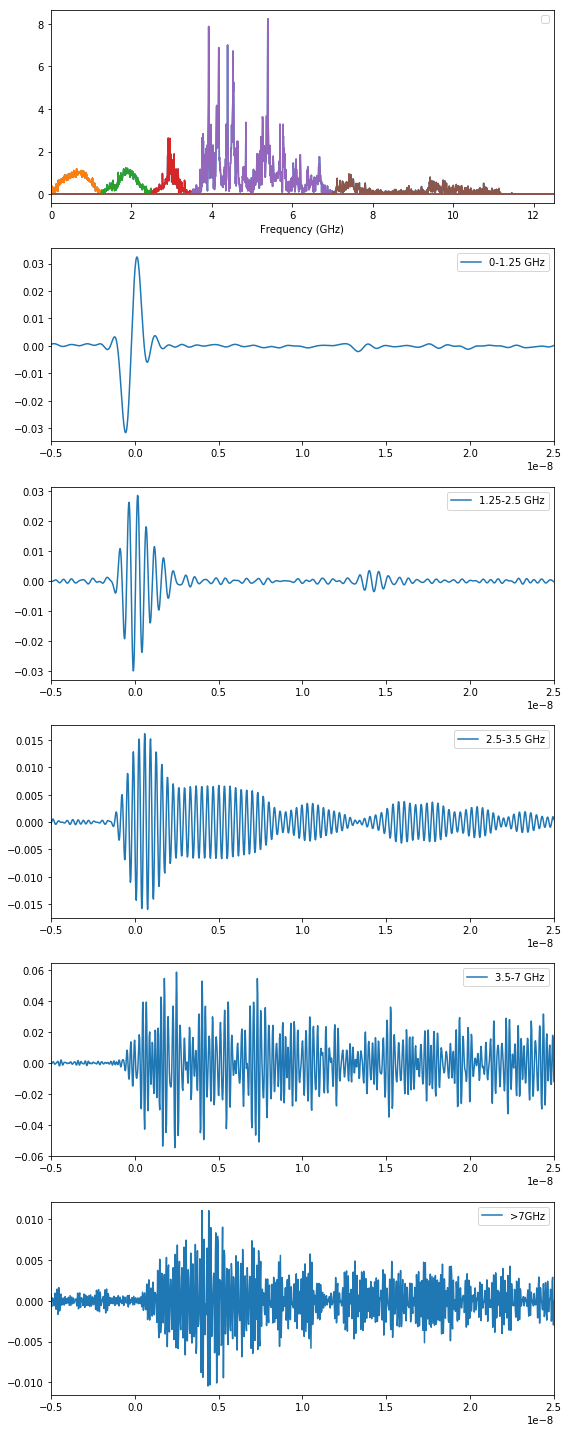

In [192]:
fig, ax = plt.subplots(6, figsize=(8,20))

full_s = do_and_plot(fig, ax[0], ch1[0], ch1[1])
cut_1 = do_and_plot(fig, ax[0], ch1[0], ch1[1], flow=0, fhi=1.25e9)
ifft_and_plot(fig, ax[1], *cut_1, label='0-1.25 GHz')
cut_2 = do_and_plot(fig, ax[0], ch1[0], ch1[1], flow=1.25e9, fhi=2.5e9)
ifft_and_plot(fig, ax[2], *cut_2, label='1.25-2.5 GHz')
cut_3 = do_and_plot(fig, ax[0], ch1[0], ch1[1], flow=2.5e9, fhi=3.48e9)
ifft_and_plot(fig, ax[3], *cut_3, label='2.5-3.5 GHz')
cut_4 = do_and_plot(fig, ax[0], ch1[0], ch1[1], flow=3.48e9, fhi=7e9)
ifft_and_plot(fig, ax[4], *cut_4, label='3.5-7 GHz')
cut_5 = do_and_plot(fig, ax[0], ch1[0], ch1[1], flow=7e9, fhi=12e9)
ifft_and_plot(fig, ax[5], *cut_5, label='>7GHz')


fig.tight_layout()

Text(0.5, 0, 'Frequency (GHz)')

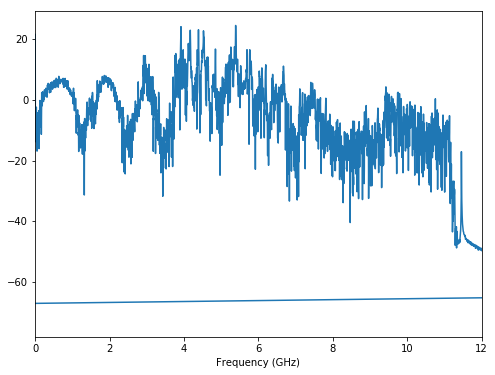

In [193]:
fig, ax = plt.subplots(1, figsize=(8,6))
# signal from the scope
tt = ch1[0]
yy = ch1[1]
# energy of the time-domain signal
E_sig = np.sum(yy**2)
# FFT
f_spectrum = fftpack.fft(yy/E_sig)
freqs = fftpack.fftfreq(tt.size, d=tt[1]-tt[0] )
# plot
plt.plot(freqs*1e-9, 20*np.log10(np.abs(f_spectrum)))
ax.set_xlim(0, 12)
ax.set_xlabel('Frequency (GHz)')



Text(0.5, 0, 'Frequency (GHz)')

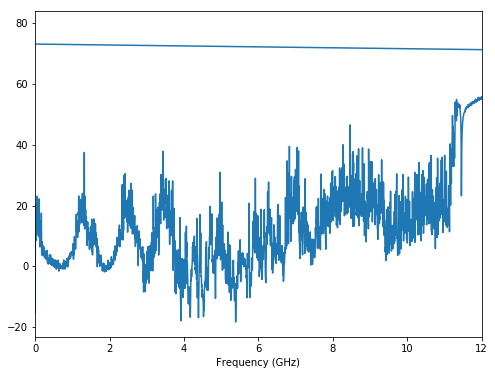

In [194]:
fig, ax = plt.subplots(1, figsize=(8,6))
# signal from the scope
tt = ch1[0]
yy = ch1[1]
# FFT
f_spectrum = fftpack.fft(yy)
freqs = fftpack.fftfreq(tt.size, d=tt[1]-tt[0] )
# spectrum energy
E_fft = np.abs(f_spectrum)**2
# plot
plt.plot(freqs*1e-9, 20*np.log10(np.abs(f_spectrum)/E_fft))
ax.set_xlim(0, 12)
ax.set_xlabel('Frequency (GHz)')



# An example

- **Time domain normalisation**

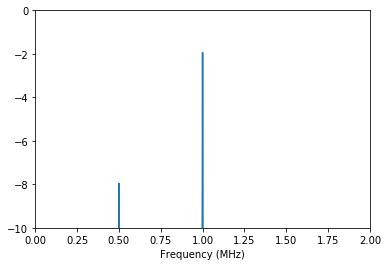

In [195]:
tt = np.linspace(0, 100e-6, 10000)
yy = np.sin(tt*2*np.pi*1e6) + 0.5*np.sin(tt*2*np.pi*1e6/2)

E_sig = np.sum(yy**2)

f_spectrum = fftpack.fft(yy/E_sig)
freqs = fftpack.fftfreq(tt.size, d=tt[1]-tt[0] )

# energies
# normalise the spectrum


plt.plot(freqs*1e-6, 20*np.log10(np.abs(f_spectrum)))
plt.xlim(0, 2)
plt.ylim(-10, 0)
plt.xlabel('Frequency (MHz)');



In [196]:
np.sort(20*np.log10(np.abs(f_spectrum)))[-4:]

array([-7.95640812, -7.95640812, -1.93977469, -1.93977469])

- **Frequency domain normalisation**

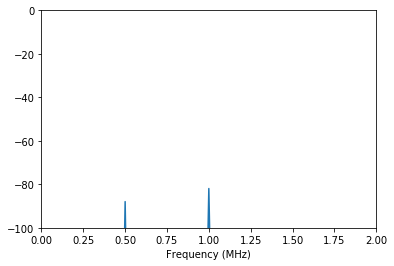

In [197]:
tt = np.linspace(0, 100e-6, 10000)
yy = np.sin(tt*2*np.pi*1e6) + 0.5*np.sin(tt*2*np.pi*1e6/2)

f_spectrum = fftpack.fft(yy)
freqs = fftpack.fftfreq(tt.size, d=tt[1]-tt[0] )

E_fft = np.sum(np.abs(f_spectrum)**2)
# energies
# normalise the spectrum


plt.plot(freqs*1e-6, 20*np.log10(np.abs(f_spectrum)/E_fft))
plt.xlim(0, 2)
plt.ylim(-100, 0)
plt.xlabel('Frequency (MHz)');



In [114]:
???????

Object `?????` not found.
